# Gantt 甘特图

需求背景：工作中需要分析基线任务中的效率瓶颈任务

甘特图可以直观的看到执行时间长的任务、多个任务堆积的时段。

下面用两种方法在Python中画甘特图：
1. plotly库
2. matplotlib库

参考资料：
1. [Gantt charts with Python’s Matplotlib](https://towardsdatascience.com/gantt-charts-with-pythons-matplotlib-395b7af72d72)
2. [Gantt charts with Python’s Matplotlib-Github](https://gist.github.com/Thiagobc23/fc12c3c69fbb90ac64b594f2c3641fcf)
3. [Gantt Charts in Python with plotly](https://plotly.com/python/gantt/#:~:text=A%20Gantt%20chart%20is%20a,the%20duration%20of%20each%20activity.)

In [7]:
import pandas as pd
import numpy as np
from pandas import Timestamp


## 1. 准备数据

In [ ]:
### 准备样例数据
data = {'Task': {0: 'TSK M',
                 1: 'TSK N',
                 2: 'TSK L',
                 3: 'TSK K',
                 4: 'TSK J',
                 5: 'TSK H',
                 6: 'TSK I',
                 7: 'TSK G',
                 8: 'TSK F',
                 9: 'TSK E',
                 10: 'TSK D',
                 11: 'TSK C',
                 12: 'TSK B',
                 13: 'TSK A'},

 'Department': {0: 'IT',
                1: 'MKT',
                2: 'ENG',
                3: 'PROD',
                4: 'PROD',
                5: 'FIN',
                6: 'MKT',
                7: 'FIN',
                8: 'MKT',
                9: 'ENG',
                10: 'FIN',
                11: 'IT',
                12: 'MKT',
                13: 'MKT'},

 'Start': {0: Timestamp('2022-03-17 00:00:00'),
           1: Timestamp('2022-03-17 00:00:00'),
           2: Timestamp('2022-03-10 00:00:00'),
           3: Timestamp('2022-03-09 00:00:00'),
           4: Timestamp('2022-03-04 00:00:00'),
           5: Timestamp('2022-02-28 00:00:00'),
           6: Timestamp('2022-02-28 00:00:00'),
           7: Timestamp('2022-02-27 00:00:00'),
           8: Timestamp('2022-02-26 00:00:00'),
           9: Timestamp('2022-02-23 00:00:00'),
           10: Timestamp('2022-02-22 00:00:00'),
           11: Timestamp('2022-02-21 00:00:00'),
           12: Timestamp('2022-02-19 00:00:00'),
           13: Timestamp('2022-02-15 00:00:00')},

 'End': {0: Timestamp('2022-03-20 00:00:00'),
         1: Timestamp('2022-03-19 00:00:00'),
         2: Timestamp('2022-03-13 00:00:00'),
         3: Timestamp('2022-03-13 00:00:00'),
         4: Timestamp('2022-03-17 00:00:00'),
         5: Timestamp('2022-03-02 00:00:00'),
         6: Timestamp('2022-03-05 00:00:00'),
         7: Timestamp('2022-03-03 00:00:00'),
         8: Timestamp('2022-02-27 00:00:00'),
         9: Timestamp('2022-03-09 00:00:00'),
         10: Timestamp('2022-03-01 00:00:00'),
         11: Timestamp('2022-03-03 00:00:00'),
         12: Timestamp('2022-02-24 00:00:00'),
         13: Timestamp('2022-02-20 00:00:00')},
}

In [9]:
df = pd.DataFrame(data)
df.head()


,Task,Department,Start,End
0,TSK M,IT,2022-03-17,2022-03-20
1,TSK N,MKT,2022-03-17,2022-03-19
2,TSK L,ENG,2022-03-10,2022-03-13
3,TSK K,PROD,2022-03-09,2022-03-13
4,TSK J,PROD,2022-03-04,2022-03-17


## 2.画图
### 2.1 使用plotly

In [10]:
### 使用plotly画图
import plotly.express as px

fig = px.timeline(df, x_start="Start", x_end="End", y="Task", color="Department") # 注意同一color的task会被自动排到一起。
fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
fig.show()
# fig.write_html('./image/gantt_plotly.html')

### 2.2 使用matplotly

1. 首先要做些数据处理工作

In [11]:
proj_start = df.Start.min()
df['start_num'] = (df.Start - proj_start).dt.days
df['end_num'] = (df.End - proj_start).dt.days

# days between start and end of each tasks
df['days_start_to_end'] = df.end_num - df.start_num

# create a column with the color for each department
def color(row):
    c_dict = {
        'MKT':'#E64646'
        , 'FIN':'#E69646'
        , 'ENG':'#34D05C'
        , 'PROD':'#34D0C3'
        , 'IT':'#3475D0'
    }
    return c_dict[row['Department']]

df['color'] = df.apply(color, axis=1)

df.head()

,Task,Department,Start,End,start_num,end_num,days_start_to_end,color
0,TSK M,IT,2022-03-17,2022-03-20,30,33,3,#3475D0
1,TSK N,MKT,2022-03-17,2022-03-19,30,32,2,#E64646
2,TSK L,ENG,2022-03-10,2022-03-13,23,26,3,#34D05C
3,TSK K,PROD,2022-03-09,2022-03-13,22,26,4,#34D0C3
4,TSK J,PROD,2022-03-04,2022-03-17,17,30,13,#34D0C3


2. 使用matplotlib画图

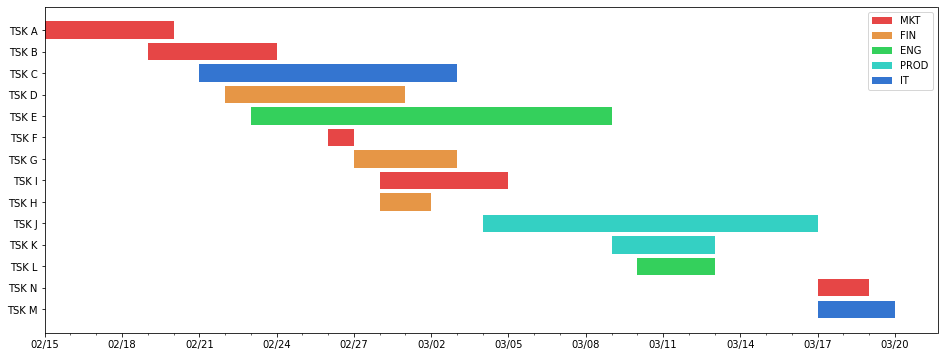

In [12]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

fig, ax = plt.subplots(1, figsize=(16,6))
ax.barh(df.Task, df.days_start_to_end, left=df.start_num, color=df.color)

### LEGENDS 图标
c_dict = {'MKT':'#E64646', 'FIN':'#E69646', 'ENG':'#34D05C',
          'PROD':'#34D0C3', 'IT':'#3475D0'}
legend_elements = [Patch(facecolor=c_dict[i], label=i)  for i in c_dict]
plt.legend(handles=legend_elements)

### TICKS 坐标点
xticks = np.arange(0, df.end_num.max()+1, 3)
xticks_labels = pd.date_range(proj_start, end=df.End.max()).strftime("%m/%d")
xticks_minor = np.arange(0, df.end_num.max()+1, 1)
ax.set_xticks(xticks)
ax.set_xticks(xticks_minor, minor=True)
ax.set_xticklabels(xticks_labels[::3])
plt.show()
# plt.savefig('./image/gantt_matplotlib.png')